In [1]:
#Uncomment this comment when you want to run the notebook on Google Colab
from google.colab import drive
drive.mount('/content/drive/')
%cd "//content/drive/My Drive/Colab Notebooks/ComputationalNeuroscience/FinalProject"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/ComputationalNeuroscience/FinalProject


In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.np_utils import to_categorical
from keras.datasets import cifar10
from keras.datasets import mnist
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from six.moves import cPickle as pickle
import os
import multiprocessing

import tensorflow as tf

### Loading dataset

In [0]:
def preprocess(dataset, normalize=True, categorical = True):

    if dataset == 'mnist':
        (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
        X_train = np.reshape(X_train, (60000, 784))
        X_test = np.reshape(X_test, (10000, 784))
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        
        if categorical:
            Y_train = to_categorical(Y_train, num_classes=10)
            Y_test = to_categorical(Y_test, num_classes=10)

    elif dataset == 'cifar10':
        (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
        X_train = np.reshape(X_train, (50000, 3072))
        X_test = np.reshape(X_test, (10000, 3072))
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        
        if categorical:
            Y_train = to_categorical(Y_train, num_classes=10)
            Y_test = to_categorical(Y_test, num_classes=10)

    # Normalization of pixel values to [0-1] range

    if normalize:
        X_train /= 255
        X_test /= 255

    return (X_train, Y_train), (X_test, Y_test)

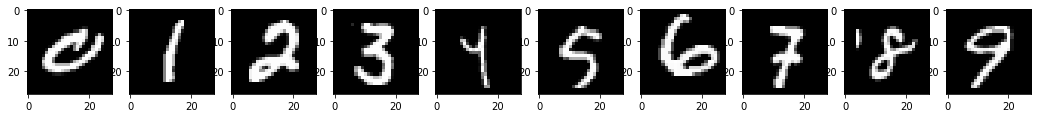

In [0]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = preprocess('mnist')

# Show a couple of data 
plt.figure(figsize = (18,4))

for i in range(10):
  r = np.random.randint(len(X_train))
  while np.where(Y_train[r] == 1)[0][0] != i:
    r = np.random.randint(len(X_train))

  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[r].reshape(28, 28), cmap = 'gray')

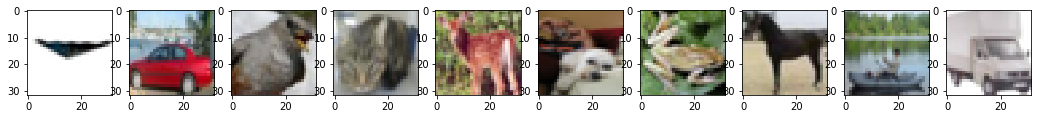

In [0]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = preprocess('cifar10')

# Show a couple of data 
plt.figure(figsize = (18,4))

for i in range(10):
  r = np.random.randint(len(X_train))
  while np.where(Y_train[r] == 1)[0][0] != i:
    r = np.random.randint(len(X_train))

  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[r].reshape(32, 32, 3))

### SVM algorithm

#### Implementing SVM on MNIST

In [0]:
(x_train, y_train), (x_test, y_test) = preprocess('mnist', categorical = False)

##### Linear Kernel

In [0]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(x_train, y_train)
y_pred = model_linear.predict(x_test)

In [0]:
print("Accuracy:", metrics.accuracy_score(y_true = y_test, y_pred = y_pred), "\n")
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

Accuracy: 0.9404 

[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]


##### RFB Kernel

In [0]:
rbf_model = SVC(kernel = 'rbf')
rbf_model.fit(x_train, y_train)
y_pred = rbf_model.predict(x_test)

In [0]:
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy: 0.9792 

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


##### Optimizing for C & Gamma

In [0]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 10)
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

model = SVC(kernel="rbf")
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1, n_jobs = -1, 
                        return_train_score=True)      

model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 180.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 307.2min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

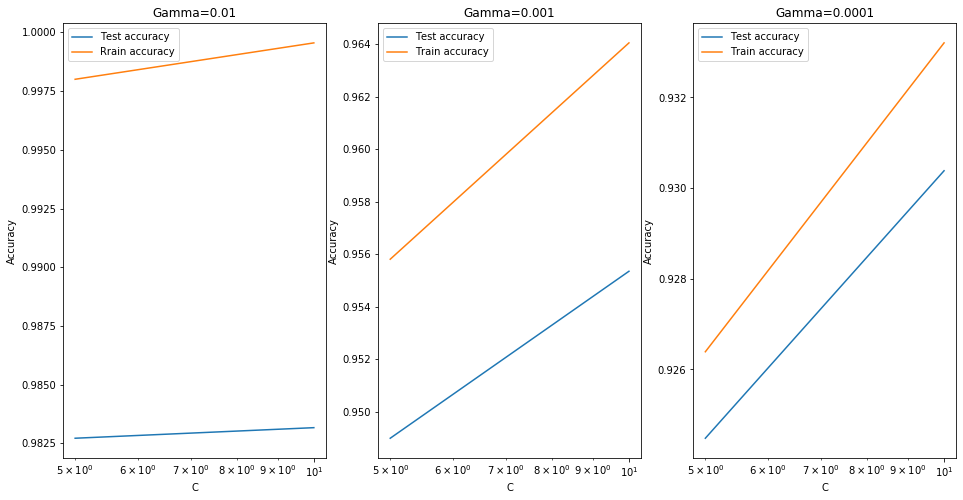

In [0]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,8))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.legend(['Test accuracy', 'Rrain accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.legend(['Test accuracy', 'Train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.legend(['Test accuracy', 'Train accuracy'], loc='upper left')
plt.xscale('log')

In [0]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9831666666666667 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [0]:
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

Accuracy 0.9576 

[[ 970    0    1    1    0    4    1    1    2    0]
 [   0 1124    3    1    0    1    3    1    2    0]
 [   7    1  984    7    4    0    9    7   11    2]
 [   0    0   11  970    0    7    0   10   10    2]
 [   1    1    8    0  944    0    3    2    2   21]
 [   6    2    2   24    3  831    8    1   12    3]
 [   7    2    3    0    3   12  929    0    2    0]
 [   2    9   21    5    7    0    0  971    1   12]
 [   5    3    5   16    6   14    6    4  914    1]
 [   5    7    2   12   25    3    1   11    4  939]] 



#### Implementing SVM on CFAR10

In [0]:
(x_train, y_train), (x_test, y_test) = preprocess('cifar10', categorical = False)

##### Linear Kernel

In [0]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train.ravel())

y_pred = model_linear.predict(x_test)

D:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy: 0.3753 

[[480  40  75  40  28  34  24  43 169  67]
 [ 81 433  45  48  27  46  37  37  66 180]
 [103  48 306  99 107  89 104  78  40  26]
 [ 57  65 130 257  71 177 127  44  34  38]
 [ 59  35 176  88 273  96 135  97  24  17]
 [ 57  52 128 195  96 291  63  60  34  24]
 [ 31  38 103 137 113  90 432  31  10  15]
 [ 73  62 101  80 114  87  34 373  24  52]
 [174  74  35  36  18  42  13  16 509  83]
 [103 208  26  34  25  25  44  59  77 399]]


##### RFB Kernel

In [0]:
rbf_model = SVC(kernel='rbf')
rbf_model.fit(x_train, y_train.ravel())
y_pred = rbf_model.predict(x_test)

D:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy: 0.5436 

[[622  23  57  17  21  15  20  28 144  53]
 [ 32 647  21  42   6  17  16  20  49 150]
 [ 85  24 407  89 133  62 112  50  23  15]
 [ 32  30  91 386  55 167 121  42  25  51]
 [ 47  14 161  68 435  44 125  68  22  16]
 [ 22  14  87 197  71 431  84  49  21  24]
 [ 11  18  64  84  95  46 641  14  13  14]
 [ 36  22  50  76  74  67  34 567  16  58]
 [ 83  66  16  22  20  19  15  18 688  53]
 [ 44 151  11  40  10  14  28  38  52 612]]


In [0]:
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

D:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.53 

[[604  23  61  22  26  12  23  33 146  50]
 [ 44 624  21  34   9  20  21  26  53 148]
 [ 86  26 420  82 127  60 111  58  18  12]
 [ 32  32 106 379  60 153 125  41  26  46]
 [ 44  11 158  61 444  53 121  70  25  13]
 [ 28  19 107 195  80 404  77  50  21  19]
 [ 10  16  82  93 107  38 614  17  14   9]
 [ 45  20  61  76  87  70  29 551  16  45]
 [ 83  58  19  27  24  23  10  12 689  55]
 [ 48 172  10  34  17  17  31  41  59 571]] 



### Network class with backpropagation algorithm

In [0]:
#============================================================
# Untility functions
#============================================================
def OneHot(z):
    '''
       Example: OneHot([[0.9, 0.1], [-0.5, 0.1]])
          returns np.array([[1,0],[0,1]])
    '''
    y = []
    # Locate the max of each row
    for zz in z:
        idx = np.argmax(zz)
        b = np.zeros_like(zz)
        b[idx] = 1.
        y.append(b)
    y = np.array(y)
    return y

def Shuffle(inputs, targets):
    '''
        s_inputs, s_targets = Shuffle(inputs, targets)
        Randomly shuffles the dataset.
        Inputs:
         inputs     array of inputs
         targets    array of corresponding targets
        Outputs:
         s_inputs   shuffled array of inputs
         s_targets  corresponding shuffled array of targets
    '''
    data = list(zip(inputs, targets))
    np.random.shuffle(data)
    s_inputs, s_targets = zip(*data)
    return np.array(s_inputs), np.array(s_targets)

def MakeBatches(data_in, data_out, batch_size = 10, shuffle = True):
    '''
    batches = MakeBatches(data_in, data_out, batch_size=10)
    Breaks up the dataset into batches of size batch_size.
    Inputs:
      data_in    is a list of inputs
      data_out   is a list of outputs
      batch_size is the number of samples in each batch
      shuffle    shuffle samples first (True)
    Output:
      batches is a list containing batches, where each batch is:
                 [in_batch, out_batch]
    Note: The last batch might be incomplete (smaller than batch_size).
    '''
    N = len(data_in)
    r = range(N)
    if shuffle:
        r = np.random.permutation(N)
    batches = []
    for k in range(0, N, batch_size):
        if k + batch_size <= N:
            din = data_in[r[k: k + batch_size]]
            dout = data_out[r[k: k + batch_size]]
        else:
            din = data_in[r[k:]]
            dout = data_out[r[k:]]
        if isinstance(din, (list, tuple)):
            batches.append( [np.stack(din, dim=0) , np.stack(dout, dim = 0)] )
        else:
            batches.append( [din, dout] )

    return batches

#==================================================
# Cost Functions
#==================================================
def CategoricalCE(y, t):
    return -np.sum(t * np.log(y)) / len(t)

#==================================================
# Layer Class
#==================================================
class Layer():
    def __init__(self, n_nodes=0, act = 'logistic'):
        '''
            lyr = Layer(n_nodes, act='logistic')
            Creates a layer object.
            Inputs:
             n_nodes  the number of nodes in the layer
             act      specifies the activation function
                      Use 'logistic' or 'softmax'
        '''
        self.N = n_nodes  # number of nodes in this layer
        self.h = []       # node activities
        self.z = []
        self.b = np.zeros(self.N)  # biases

        if act=='softmax':
            self.sigma = self.Softmax
            self.sigma_p = None
        elif act=='logistic':
            self.sigma = self.Logistic
            self.sigma_p = self.Logistic_p

    def Logistic(self):
        return 1. / (1. + np.exp(-self.z))
    def Logistic_p(self):
        return self.h * (1. - self.h)
    def Softmax(self):
        v = np.exp(self.z)
        s = np.sum(v, axis = 1)
        return v / np.tile(s[:, np.newaxis], [1, np.shape(v)[1]])

#==================================================
# Network Class
#==================================================
class Network():

    def __init__(self, sizes):
        '''
            net = Network(sizes)
            Creates a Network and saves it in the variable 'net'.
            Inputs:
              sizes is a list of integers specifying the number
                  of nodes in each layer
                  eg. [5, 20, 3] will create a 3-layer network
                      with 5 input, 20 hidden, and 3 output nodes
        '''
        self.n_layers = 0 #len(sizes)
        self.lyr = []    # a list of Layers
        self.W = []      # Weight matrices, indexed by the layer below it

        self.type = type # 'Bernoulli', 'classifier', 'regression'
        self.Loss = CategoricalCE
        self.output_activation = 'softmax'

        # Create and add Layers (using logistic for hidden layers)
        for n in sizes[:-1]:
            self.AddLayer( Layer(n) )
        # For the top layer, we use the appropriate activtaion function
        self.AddLayer(Layer(sizes[-1], act = self.output_activation))


    def AddLayer(self, layer):
        self.lyr.append(layer)
        self.n_layers += 1
        # If this isn't our first layer, add connection weights
        if self.n_layers >= 2:
            m = self.lyr[-1].N
            n = self.lyr[-2].N
            temp = np.random.normal(size = [n,m]) / np.sqrt(n)
            self.W.append(temp)

    def FeedForward(self, x):
        '''
            y = net.FeedForward(x)
            Runs the network forward, starting with x as input.
            Returns the activity of the output layer.
            All node use
            Note: The activation function used for the output layer
            depends on what self.Loss is set to.
        '''
        x = np.array(x)  # Convert input to array, in case it's not

        self.lyr[0].h = x # [1] Set input layer

        # Loop over connections...
        for pre,post,W in zip(self.lyr[:-1], self.lyr[1:], self.W):

            # Calc. (and record) input current to next layer
            post.z = pre.h @ W + post.b

            # Use activation function to get activities
            post.h = post.sigma()

        # Return activity of output layer
        return self.lyr[-1].h

    def TopGradient(self, t):
        '''
            dEdz = net.TopGradient(targets)
            Computes and returns the gradient of the cost with respect to the input current
            to the output nodes.
            Inputs:
              targets is a batch of targets corresponding to the last FeedForward run
            Outputs:
              dEdz is a batch of gradient vectors corresponding to the output nodes
        '''
        return (self.lyr[-1].h - t) / len(t)

    def BackProp(self, t, lrate = 0.05, decay = 0.):
        '''
            net.BackProp(targets, lrate=0.05)
            Given the current network state and targets t, updates the connection
            weights and biases using the backpropagation algorithm.
            Inputs:
             t      an array of targets (number of samples must match the
                    network's output)
             lrate  learning rate
        '''
        
        t = np.array(t)  # convert t to an array, in case it's not

        # Error gradient for top layer
        dEdz = self.TopGradient(t)

        # Loop down through the layers; Start second-from-the-top, and go down to layer 0
        for i in range(self.n_layers - 2, -1, -1):
            pre = self.lyr[i]

            # Gradient w.r.t. weights
            dEdW = pre.h.T @ dEdz

            # Gradient w.r.t. biases
            dEdb = np.sum(dEdz, axis = 0)

            # Project error gradient down to layer below
            dEdz = ( dEdz @ self.W[i].T ) * pre.sigma_p()

            # Update weights and biases
            self.W[i] -= lrate * dEdW
            self.lyr[i + 1].b -= lrate * dEdb

            #Applying decay to avoid overfitting
            self.W[i] -= 2 * self.W[i] * decay * lrate             # L2 decay
            self.lyr[i + 1].b -= 2 * self.lyr[i + 1].b * decay * lrate # L2 decay

    def SGD(self, inputs, targets, testInputs, testTargets, lrate=0.05, decay = 0.,  epochs=1, batch_size=10):
        '''
            net.SGD(inputs, targets, testInputs, testTargets, lrate=0.05, epochs=1, batch_size=10)

            Performs Stochastic Gradient Descent on the network.
            Run through the dataset in batches 'epochs' number of times, incrementing the
            network weights after each batch. For each epoch, it shuffles the dataset.
            Inputs:
              inputs  is an array of input samples (train input)
              targets is a corresponding array of targets (train target)
              testInput is an array of samples used for evaluation
              testTargets is a corresponding array of targets
              lrate   is the learning rate (try 0.001 to 5)
              epochs  is the number of times to go through the training data
              batch_size is the number of samples for each batch
            Outputs:
              loss_history is an (epochs)x2 array with epoch in the first column, and
                      cost in the second column
              testAcc_history is an (epochs)x2 array with epoch in the first column, and
                      test accuracy in the second column
        '''
        
        loss_history = []   
        testAcc_history = []

        for k in range(epochs):
            batches = MakeBatches(inputs, targets, batch_size = batch_size, shuffle = False)
            
            for mini_batch in batches:
                self.FeedForward(mini_batch[0])
                self.BackProp(mini_batch[1], lrate = lrate, decay = decay)

            loss_history.append([k, self.Evaluate(inputs, targets)])
            testAcc_history.append([k, self.ClassificationAccuracy(testInputs, testTargets) * 100])

            print('Epoch ' + str(k) + ' cost: ' + str(loss_history[-1][1]) + ' test_accuracy: ' + str(testAcc_history[-1][1]) + ' %')

        return np.array(loss_history), np.array(testAcc_history)

    def Evaluate(self, inputs, targets):
        '''
            E = net.Evaluate(data)
            Computes the average loss over the supplied dataset.
            Inputs
             inputs  is an array of inputs
             targets is a list of corresponding targets
            Outputs
             E is a scalar, the average loss
        '''        
        y = self.FeedForward(inputs)
        return self.Loss(y, targets)

    def ClassificationAccuracy(self, inputs, targets):
        '''
            net.ClassificationAccuracy(data)
            Returns the fraction (between 0 and 1) of correct one-hot classifications
            in the dataset.
        '''
        y = self.FeedForward(inputs)
        yb = OneHot(y)
        n_incorrect = np.sum(yb != targets) / 2.
        return 1. - float(n_incorrect) / len(inputs)

#### Implemeting Backprop on MNIST

In [0]:
(X_train, Y_train), (X_test, Y_test) = preprocess('mnist')

In [0]:
net = Network([784, 500, 10]) 

In [0]:
trainLoss, testAccuracy = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.5, decay = 0.0, epochs = 400, batch_size = 128)

Epoch 0 cost: 0.3619611331335967 test_accuracy: 89.29 %
Epoch 1 cost: 0.29622260255420263 test_accuracy: 91.31 %
Epoch 2 cost: 0.25495168586381445 test_accuracy: 92.43 %
Epoch 3 cost: 0.22119596007795764 test_accuracy: 93.42 %
Epoch 4 cost: 0.1937982119310739 test_accuracy: 94.17999999999999 %
Epoch 5 cost: 0.17177732513410393 test_accuracy: 94.71000000000001 %
Epoch 6 cost: 0.15392264833676894 test_accuracy: 95.15 %
Epoch 7 cost: 0.13922561875260056 test_accuracy: 95.5 %
Epoch 8 cost: 0.12694110131313022 test_accuracy: 95.77 %
Epoch 9 cost: 0.11652732804205966 test_accuracy: 96.05 %
Epoch 10 cost: 0.10758345583946302 test_accuracy: 96.36 %
Epoch 11 cost: 0.09980937600231976 test_accuracy: 96.58 %
Epoch 12 cost: 0.09298011179313165 test_accuracy: 96.75 %
Epoch 13 cost: 0.08692635801391833 test_accuracy: 96.84 %
Epoch 14 cost: 0.08151997109005057 test_accuracy: 96.89999999999999 %
Epoch 15 cost: 0.07666238425556282 test_accuracy: 96.96000000000001 %
Epoch 16 cost: 0.07227472731188343 te

In [0]:
#saving the result of BP on MNIST
with open('BP_MNIST.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)

Plotting the result of implementing Backprop on MNIST 

Text(0, 0.5, 'test accuracy %')

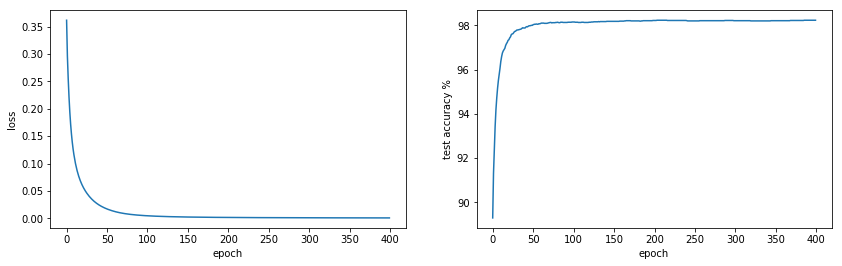

In [0]:
with open('BP_MNIST.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)

plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1])
plt.xlabel('epoch'); plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1])
plt.xlabel('epoch'); plt.ylabel('test accuracy %')

#### Implemeting Backprop on CFAR10

In [0]:
(X_train, Y_train), (X_test, Y_test) = preprocess('cifar10')
net = Network([3072, 1000, 10]) 
trainLoss, testAccuracy = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.5, decay = 0.0, epochs = 400, batch_size = 128)

170500096/170498071 [==============================] - 6s 0us/step
Epoch 0 cost: 1.8949757368567903 test_accuracy: 33.269999999999996 %
Epoch 1 cost: 1.7820857855186059 test_accuracy: 36.870000000000005 %
Epoch 2 cost: 1.7219735062661317 test_accuracy: 38.6 %
Epoch 3 cost: 1.6600457543549885 test_accuracy: 40.400000000000006 %
Epoch 4 cost: 1.6062176630810783 test_accuracy: 42.06999999999999 %
Epoch 5 cost: 1.5753026747630938 test_accuracy: 42.910000000000004 %
Epoch 6 cost: 1.5452018718712894 test_accuracy: 44.13 %
Epoch 7 cost: 1.5231302980179442 test_accuracy: 44.620000000000005 %
Epoch 8 cost: 1.5507048440885212 test_accuracy: 43.21 %
Epoch 9 cost: 1.5147858170928945 test_accuracy: 44.19 %
Epoch 10 cost: 1.589821037166099 test_accuracy: 42.24 %
Epoch 11 cost: 1.5692274059131188 test_accuracy: 43.26 %
Epoch 12 cost: 1.4997083887963745 test_accuracy: 44.98 %
Epoch 13 cost: 1.4239527484652734 test_accuracy: 46.45 %
Epoch 14 cost: 1.4195193950334766 test_accuracy: 46.17 %
Epoch 15 cost

In [0]:
#saving the result of BP on CFAR10
with open('BP_CFAR10.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)

Plotting the result of implementing Backprop with lr = 0.5 on CFAR10

Text(0, 0.5, 'test accuracy %')

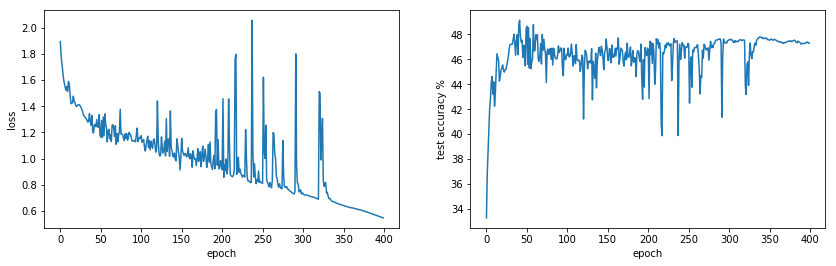

In [0]:
with open('BP_CFAR10.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)

plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1])
plt.xlabel('epoch'); plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1])
plt.xlabel('epoch'); plt.ylabel('test accuracy %')

The fluctuations observed in the plots show that the learning rate is high. We are going to rerun the code with smaller learning rate. 

In [0]:
(X_train, Y_train), (X_test, Y_test) = preprocess('cifar10')
net = Network([3072, 1000, 10]) 
trainLoss, testAccuracy = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.1, decay = 0.0, epochs = 400, batch_size = 128)

Epoch 0 cost: 1.8974586915624154 test_accuracy: 33.79 %
Epoch 1 cost: 1.8321579484558825 test_accuracy: 36.21 %
Epoch 2 cost: 1.7889565624654258 test_accuracy: 37.970000000000006 %
Epoch 3 cost: 1.7531809137005734 test_accuracy: 39.239999999999995 %
Epoch 4 cost: 1.7200671801451033 test_accuracy: 40.339999999999996 %
Epoch 5 cost: 1.689048984579109 test_accuracy: 41.279999999999994 %
Epoch 6 cost: 1.6617490458360946 test_accuracy: 41.71 %
Epoch 7 cost: 1.638926422159207 test_accuracy: 42.059999999999995 %
Epoch 8 cost: 1.6197466565032985 test_accuracy: 42.47 %
Epoch 9 cost: 1.6027816120618295 test_accuracy: 42.779999999999994 %
Epoch 10 cost: 1.5869936237568927 test_accuracy: 43.32 %
Epoch 11 cost: 1.5718985244899464 test_accuracy: 43.620000000000005 %
Epoch 12 cost: 1.5573114129814607 test_accuracy: 43.87 %
Epoch 13 cost: 1.5431591722761457 test_accuracy: 44.3 %
Epoch 14 cost: 1.5294112377426148 test_accuracy: 44.720000000000006 %
Epoch 15 cost: 1.5160554218804687 test_accuracy: 45.02

Epoch 131 cost: 0.7551506106722682 test_accuracy: 53.449999999999996 %
Epoch 132 cost: 0.7512581431166728 test_accuracy: 53.44 %
Epoch 133 cost: 0.747383949488222 test_accuracy: 53.32 %
Epoch 134 cost: 0.7435260215702154 test_accuracy: 53.22 %
Epoch 135 cost: 0.7396823131646545 test_accuracy: 53.2 %
Epoch 136 cost: 0.7358507547186313 test_accuracy: 53.15 %
Epoch 137 cost: 0.732029251761225 test_accuracy: 53.13 %
Epoch 138 cost: 0.7282156643938462 test_accuracy: 53.11 %
Epoch 139 cost: 0.7244077642017315 test_accuracy: 53.08999999999999 %
Epoch 140 cost: 0.7206031420196048 test_accuracy: 53.059999999999995 %
Epoch 141 cost: 0.7167989433388252 test_accuracy: 53.06999999999999 %
Epoch 142 cost: 0.7129909161394374 test_accuracy: 53.06999999999999 %
Epoch 143 cost: 0.7091656545202882 test_accuracy: 53.05 %
Epoch 144 cost: 0.7048580984172277 test_accuracy: 53.02 %
Epoch 145 cost: 0.6997754512161495 test_accuracy: 52.94 %
Epoch 146 cost: 0.6977098241944005 test_accuracy: 53.11 %
Epoch 147 cos

Epoch 261 cost: 0.38536212553497057 test_accuracy: 51.129999999999995 %
Epoch 262 cost: 0.3494640275377527 test_accuracy: 51.6 %
Epoch 263 cost: 0.4176890948042895 test_accuracy: 50.75000000000001 %
Epoch 264 cost: 0.34151272651285486 test_accuracy: 51.7 %
Epoch 265 cost: 0.34300526694244815 test_accuracy: 51.74000000000001 %
Epoch 266 cost: 0.36682357363678236 test_accuracy: 51.150000000000006 %
Epoch 267 cost: 0.34024261434368286 test_accuracy: 51.65 %
Epoch 268 cost: 0.3992362505389172 test_accuracy: 50.82 %
Epoch 269 cost: 0.33333641485517224 test_accuracy: 51.61 %
Epoch 270 cost: 0.36550517259475207 test_accuracy: 51.2 %
Epoch 271 cost: 0.3285786293585642 test_accuracy: 51.77 %
Epoch 272 cost: 0.32664254686239497 test_accuracy: 51.580000000000005 %
Epoch 273 cost: 0.3302335605249892 test_accuracy: 51.7 %
Epoch 274 cost: 0.325131994583992 test_accuracy: 51.6 %
Epoch 275 cost: 0.3759899258370637 test_accuracy: 50.940000000000005 %
Epoch 276 cost: 0.3252734196399491 test_accuracy: 51

Epoch 386 cost: 0.16225064834354963 test_accuracy: 51.31 %
Epoch 387 cost: 0.16123416282377503 test_accuracy: 51.39 %
Epoch 388 cost: 0.16022251392370457 test_accuracy: 51.39 %
Epoch 389 cost: 0.15921581680981814 test_accuracy: 51.370000000000005 %
Epoch 390 cost: 0.15821418866215753 test_accuracy: 51.4 %
Epoch 391 cost: 0.15721774605116604 test_accuracy: 51.38 %
Epoch 392 cost: 0.15622660273783007 test_accuracy: 51.38 %
Epoch 393 cost: 0.15524086793358016 test_accuracy: 51.4 %
Epoch 394 cost: 0.15426064501491543 test_accuracy: 51.44 %
Epoch 395 cost: 0.1532860306573034 test_accuracy: 51.42 %
Epoch 396 cost: 0.15231711433327716 test_accuracy: 51.44 %
Epoch 397 cost: 0.1513539781096111 test_accuracy: 51.43 %
Epoch 398 cost: 0.15039669667615257 test_accuracy: 51.43 %
Epoch 399 cost: 0.14944533754238123 test_accuracy: 51.42 %


In [0]:
#saving the result of implementing of BP with lr = 0.1 
with open('BP_CFAR10_lr1.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)

Plotting the result of implementing Backprop with lr = 0.1 on CFAR10

Text(0, 0.5, 'test accuracy %')

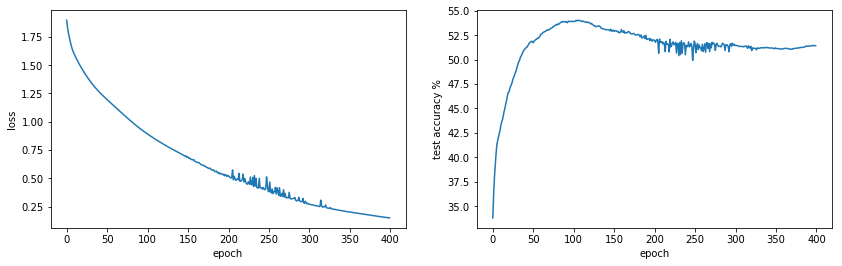

In [0]:
with open('BP_CFAR10_lr1.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)

plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1])
plt.xlabel('epoch'); plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1])
plt.xlabel('epoch'); plt.ylabel('test accuracy %')

Comparing Backprob on CFAR10 with different learning rate

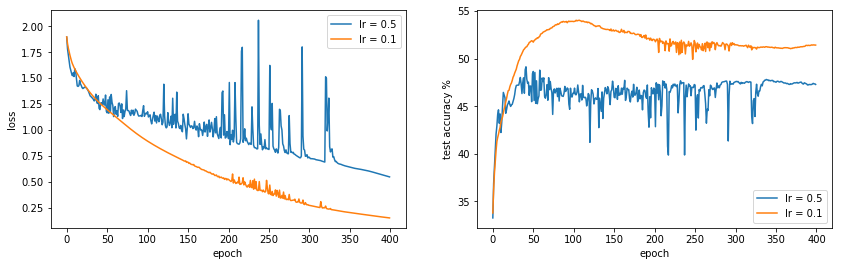

In [0]:
with open('BP_CFAR10.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)
    
with open('BP_CFAR10_lr1.pickle', 'rb') as f:
    trainLoss_lr1 = pickle.load(f)
    testAccuracy_lr1 = pickle.load(f)

plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1], label = 'lr = 0.5')
plt.plot(trainLoss_lr1[:, 0], trainLoss_lr1[:, 1], label = 'lr = 0.1')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1], label = 'lr = 0.5')
plt.plot(testAccuracy_lr1[:, 0], testAccuracy_lr1[:, 1], label = 'lr = 0.1')
plt.xlabel('epoch'); plt.ylabel('test accuracy %')
plt.legend()

**Discussion**

The results show that $0.1$ is a sutable amount for the learning rate hyper parameter, 
when implementing the Backprop algorithm on CFAR10 dataset.   

### Network class with feedback alighnment algorithm 

In [0]:
class FA_Network(Network):

    def __init__(self, sizes, seed = None):
        super(FA_Network, self).__init__(sizes)
        
        if (seed):
          np.random.seed(seed)
        # setting backward matrices
        self.backward_W = [np.sqrt(1. / (m + n)) * np.random.randn(n, m) for m, n in zip(sizes[:-1], sizes[1:])]
  
    def BackProp(self, t, lrate = 0.05, decay = 0.):
        t = np.array(t)  # convert t to an array, in case it's not
        # Error gradient for top layer
        dEdz = self.TopGradient(t)

        # Loop down through the layers; Start second-from-the-top, and go down to layer 0
        for i in range(self.n_layers - 2, -1, -1):
            pre = self.lyr[i]
            # Gradient w.r.t. weights
            dEdW = pre.h.T @ dEdz
            # Gradient w.r.t. biases
            dEdb = np.sum(dEdz, axis = 0)
            # Project error gradient down to layer below
            dEdz = (dEdz @ self.backward_W[i]) * pre.sigma_p()
            # Update weights and biases
            self.W[i] -= lrate * dEdW
            self.lyr[i + 1].b -= lrate * dEdb
            #Applying decay to avoid overfitting
            self.W[i] -= 2 * self.W[i] * decay * lrate             # L2 decay
            self.lyr[i + 1].b -= 2 * self.lyr[i + 1].b * decay * lrate # L2 decay

    def SGD(self, inputs, targets, testInputs, testTargets, lrate=0.05, decay = 0.,  epochs=1, batch_size=10):
        loss_history = []   
        testAcc_history = []
        angle_history = []

        for k in range(epochs):
            batches = MakeBatches(inputs, targets, batch_size = batch_size, shuffle = False)
            for mini_batch in batches:
                self.FeedForward(mini_batch[0])
                self.BackProp(mini_batch[1], lrate = lrate, decay = decay)

            loss_history.append([k, self.Evaluate(inputs, targets)])
            testAcc_history.append([k, self.ClassificationAccuracy(testInputs, testTargets) * 100])
            angle_history.append([k, self.EvaluateAngle(inputs, targets)])

            print('Epoch ' + str(k) + ' cost: ' + str(loss_history[-1][1]) + \
                  '     test_accuracy: ' + str(testAcc_history[-1][1]) + '%' + \
                  '     angle_between_deltas: ' + str(angle_history[-1][1]))

        return np.array(loss_history), np.array(testAcc_history), np.array(angle_history)

    def angle_between(self, A, B):
        '''
            Description: computes the angle between two matrices A and B
            Inputs:
             A: a first matrix
             B: a second matrix
            Outputs:
             angle: the angle between the two vectors resulting from vectorizing and normalizing A and B
        '''
        flat_A = np.reshape(A, (-1))  # in case when A and B are matrices
        normalized_flat_A = flat_A / np.linalg.norm(flat_A)
        flat_B = np.reshape(B, (-1))
        normalized_flat_B = flat_B / np.linalg.norm(flat_B)

        angle = (180.0 / np.pi) * np.arccos(np.clip(np.dot(normalized_flat_A, normalized_flat_B), -1.0, 1.0))

        return angle

    def EvaluateAngle(self, X_train, Y_train):

        '''
        Description: computes the angle between both:
                       - the delta signals
        Inputs:
            - X_train, y_train: training feature and corresponding label
        Outputs:
            - deltas_angles: the angle between the delta signal and the backpropagation delta signal
               '''
        delta_angles = []
        #r = np.random.randint(len(X_train))
        r = 10
        self.FeedForward(X_train[r].reshape(1, len(X_train[r])))
        
        t = np.array(Y_train[r])  # convert t to an array, in case it's not
        
        # Error gradient for top layer
        dEdz = self.TopGradient(t)
        dEdz_BP = self.TopGradient(t)

        # Loop down through the layers; Start second-from-the-top, and go down to layer 0
        for i in range(self.n_layers - 2, 0, -1):
            pre = self.lyr[i]

            # Project error gradient down to layer below
            dEdz_BP = (dEdz_BP @ self.W[i].T) * pre.sigma_p()
            dEdz = (dEdz @ self.backward_W[i]) * pre.sigma_p()
            
            delta_angles.insert(0, self.angle_between(dEdz_BP, dEdz))
             
        return np.array(delta_angles)

#### Implemeting Feedback Alignment on MNIST

In [0]:
(X_train, Y_train), (X_test, Y_test) = preprocess('mnist')
net = FA_Network([784, 500, 10], seed = 10) 
trainLoss, testAccuracy, deltaAngles = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.5, decay = 0.0, epochs = 400, batch_size = 128)

Epoch 0 cost: 0.7552621384629721     test_accuracy: 78.74%     angle_between_deltas: [41.75746713]
Epoch 1 cost: 0.5408013272107531     test_accuracy: 84.96000000000001%     angle_between_deltas: [39.10343947]
Epoch 2 cost: 0.4678473524998809     test_accuracy: 87.09%     angle_between_deltas: [38.1806663]
Epoch 3 cost: 0.42523101791440154     test_accuracy: 88.26%     angle_between_deltas: [37.80827877]
Epoch 4 cost: 0.39590994576530786     test_accuracy: 89.13%     angle_between_deltas: [37.72302768]
Epoch 5 cost: 0.37304218817995066     test_accuracy: 89.69%     angle_between_deltas: [37.81330762]
Epoch 6 cost: 0.3538307065442019     test_accuracy: 90.06%     angle_between_deltas: [38.0256399]
Epoch 7 cost: 0.3370182981779379     test_accuracy: 90.36%     angle_between_deltas: [38.32468287]
Epoch 8 cost: 0.3219099708661807     test_accuracy: 90.77%     angle_between_deltas: [38.68112867]
Epoch 9 cost: 0.3083889736968575     test_accuracy: 91.14999999999999%     angle_between_deltas:

In [0]:
with open('FA_MNIST.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)
    pickle.dump(deltaAngles, f)

Plotting the result of implementing Feedback Alignment of MNIST

Text(0, 0.5, '$\\delta_{BP} \\measuredangle \\delta_{FA} $')

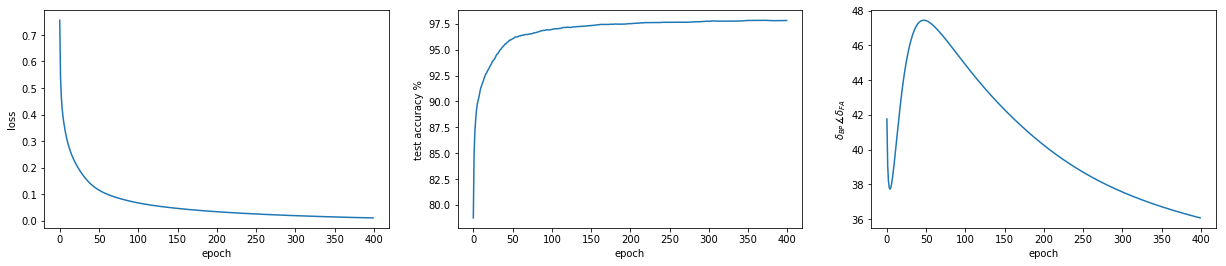

In [0]:
with open('FA_MNIST.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)
    deltaAngles = pickle.load(f)


plt.figure(figsize = (21, 4))
plt.subplot(1,3,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1])
plt.xlabel('epoch'); plt.ylabel('loss')

plt.subplot(1,3,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1])
plt.xlabel('epoch'); plt.ylabel('test accuracy %')

plt.subplot(1,3,3)
plt.plot(deltaAngles[:, 0], deltaAngles[:, 1])
plt.xlabel('epoch'); plt.ylabel('$\delta_{BP} \measuredangle \delta_{FA} $')

**Discussion**

The feedback alignment work on MNIST quit well. 

The interesting observation is that the angel between $\delta_{BP}$ and $\delta_{FA}$  vectors is less than 90 $^{\circ}$ in all epochs. Moreover, it has declining trend from $epoch \approx 50$ which shows more alignment between these two vectors.  


#### Implemeting Feedback Alignment on CFAR10

In [0]:
(X_train, Y_train), (X_test, Y_test) = preprocess('cifar10')
net = FA_Network([3072, 1000, 10], seed = 17) 
trainLoss, testAccuracy, deltaAngles = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.5, decay = 0.0, epochs = 400, batch_size = 128)

Epoch 0 cost: 64.19063866316655     test_accuracy: 12.150000000000006%     angle_between_deltas: [120.06321189]
Epoch 1 cost: 67.98060467803072     test_accuracy: 11.809999999999999%     angle_between_deltas: [112.43688767]
Epoch 2 cost: 61.76103478547762     test_accuracy: 9.98%     angle_between_deltas: [106.35457702]
Epoch 3 cost: 49.421205798039296     test_accuracy: 14.219999999999999%     angle_between_deltas: [97.08503476]
Epoch 4 cost: 48.542250112210084     test_accuracy: 17.589999999999996%     angle_between_deltas: [95.35398682]
Epoch 5 cost: 31.288328876150665     test_accuracy: 23.509999999999998%     angle_between_deltas: [77.95334284]
Epoch 6 cost: 39.82941166071416     test_accuracy: 15.890000000000004%     angle_between_deltas: [100.84982333]
Epoch 7 cost: 39.46958007595225     test_accuracy: 25.1%     angle_between_deltas: [93.011747]
Epoch 8 cost: 27.107981053951384     test_accuracy: 24.919999999999998%     angle_between_deltas: [81.87240852]
Epoch 9 cost: 18.020063

In [0]:
with open('FA_CFAR10.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)
    pickle.dump(deltaAngles, f)

In [0]:
with open('FA_CFAR10.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)
    deltaAngles = pickle.load(f)


plt.figure(figsize = (21, 4))
plt.subplot(1,3,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1])
plt.xlabel('epoch'); plt.ylabel('loss')

plt.subplot(1,3,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1])
plt.xlabel('epoch'); plt.ylabel('test accuracy %')

plt.subplot(1,3,3)
plt.plot(deltaAngles[:, 0], deltaAngles[:, 1])
plt.xlabel('epoch'); plt.ylabel('$\delta_{BP} \measuredangle \delta_{FA} $')

Text(0, 0.5, '$\\delta_{BP} \\measuredangle \\delta_{FA} $')

In [0]:
(X_train, Y_train), (X_test, Y_test) = preprocess('cifar10')
net = FA_Network([3072, 1000, 10], seed = 17) 
trainLoss, testAccuracy, deltaAngles = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.2, decay = 0.0, epochs = 400, batch_size = 128)

170500096/170498071 [==============================] - 6s 0us/step
Epoch 0 cost: 30.090725605327346     test_accuracy: 15.769999999999996%     angle_between_deltas: [78.08845461]
Epoch 1 cost: 15.562599679730841     test_accuracy: 16.390000000000004%     angle_between_deltas: [120.69809466]
Epoch 2 cost: 17.81432056057941     test_accuracy: 11.760000000000003%     angle_between_deltas: [88.72915173]
Epoch 3 cost: 16.531406346876956     test_accuracy: 20.040000000000003%     angle_between_deltas: [85.26035468]
Epoch 4 cost: 14.113273217780424     test_accuracy: 23.229999999999997%     angle_between_deltas: [89.77244779]
Epoch 5 cost: 19.5885184934608     test_accuracy: 17.12%     angle_between_deltas: [87.50974456]
Epoch 6 cost: 11.42780311625252     test_accuracy: 23.49%     angle_between_deltas: [96.76342317]
Epoch 7 cost: 13.89476114489249     test_accuracy: 24.91%     angle_between_deltas: [83.58537275]
Epoch 8 cost: 11.287570400525832     test_accuracy: 29.159999999999997%     angl

The same as previous section, the fluctuations in the plots are too much which as indication that the learning rate is high. We are going to rerun the code with smaller learning rates, i.e., 0.2 
and 0.1. 

In [0]:
with open('FA_CFAR10_lr2.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)
    pickle.dump(deltaAngles, f)

In [0]:
(X_train, Y_train), (X_test, Y_test) = preprocess('cifar10')
net = FA_Network([3072, 1000, 10], seed = 17) 
trainLoss, testAccuracy, deltaAngles = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.1, decay = 0.0, epochs = 400, batch_size = 128)

170500096/170498071 [==============================] - 4s 0us/step
Epoch 0 cost: 3.575388881220895     test_accuracy: 20.499999999999996%     angle_between_deltas: [113.42942873]
Epoch 1 cost: 4.460368809995883     test_accuracy: 18.100000000000005%     angle_between_deltas: [105.64982956]
Epoch 2 cost: 3.8193460509730004     test_accuracy: 22.89%     angle_between_deltas: [92.80973346]
Epoch 3 cost: 3.1446292879856546     test_accuracy: 27.780000000000005%     angle_between_deltas: [102.69678554]
Epoch 4 cost: 3.696420832928085     test_accuracy: 22.529999999999994%     angle_between_deltas: [100.57313148]
Epoch 5 cost: 3.5910778656978213     test_accuracy: 24.639999999999993%     angle_between_deltas: [95.33253846]
Epoch 6 cost: 3.6571625401425134     test_accuracy: 30.620000000000005%     angle_between_deltas: [86.27106716]
Epoch 7 cost: 3.7646204981209896     test_accuracy: 25.439999999999998%     angle_between_deltas: [86.51307284]
Epoch 8 cost: 3.2546951903978427     test_accurac

In [0]:
with open('FA_CFAR10_lr1.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)
    pickle.dump(deltaAngles, f)

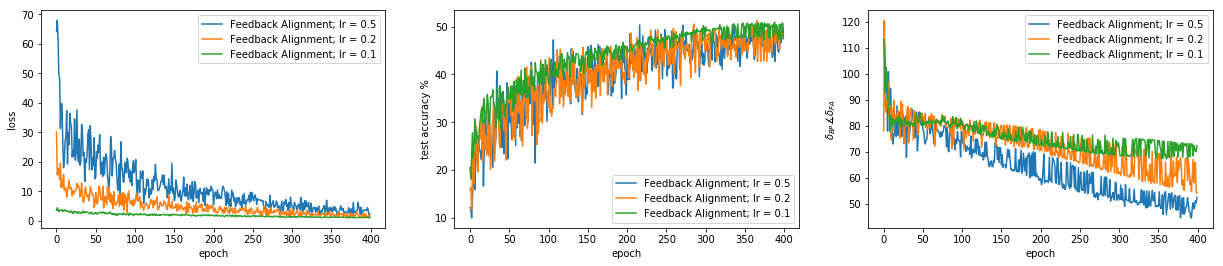

In [0]:
with open('FA_CFAR10.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)
    deltaAngles = pickle.load(f)

with open('FA_CFAR10_lr2.pickle', 'rb') as f:
    trainLoss_lr2 = pickle.load(f)
    testAccuracy_lr2 = pickle.load(f)
    deltaAngles_lr2 = pickle.load(f)

with open('FA_CFAR10_lr1.pickle', 'rb') as f:
    trainLoss_lr1 = pickle.load(f)
    testAccuracy_lr1 = pickle.load(f)
    deltaAngles_lr1 = pickle.load(f)


plt.figure(figsize = (21, 4))
plt.subplot(1,3,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1], label = 'Feedback Alignment; lr = 0.5')
plt.plot(trainLoss_lr2[:, 0], trainLoss_lr2[:, 1], label = 'Feedback Alignment; lr = 0.2')
plt.plot(trainLoss_lr1[:, 0], trainLoss_lr1[:, 1], label = 'Feedback Alignment; lr = 0.1')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.legend()

plt.subplot(1,3,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1], label = 'Feedback Alignment; lr = 0.5')
plt.plot(testAccuracy_lr2[:, 0], testAccuracy_lr2[:, 1], label = 'Feedback Alignment; lr = 0.2')
plt.plot(testAccuracy_lr1[:, 0], testAccuracy_lr1[:, 1], label = 'Feedback Alignment; lr = 0.1')
plt.xlabel('epoch'); plt.ylabel('test accuracy %')
plt.legend()

plt.subplot(1,3,3)
plt.plot(deltaAngles[:, 0], deltaAngles[:, 1], label = 'Feedback Alignment; lr = 0.5')
plt.plot(deltaAngles_lr2[:, 0], deltaAngles_lr2[:, 1], label = 'Feedback Alignment; lr = 0.2')
plt.plot(deltaAngles_lr1[:, 0], deltaAngles_lr1[:, 1], label = 'Feedback Alignment; lr = 0.1')
plt.xlabel('epoch'); plt.ylabel('$\delta_{BP} \measuredangle \delta_{FA} $')
plt.legend()

**Discussion**

By reducing the learning rate, the magnitude of fluctuations has decreased. As opposed to backpropagation algorithm, there is still fluctuations in results with learning rate = 0.1. However, for the sake of fair comparison between these two algorithms we are going to report the result for lr = 0.1.  

### Comparison between FA and BP

#### Comparison between FA & BP on MNIST

In [0]:
with open('BP_MNIST.pickle', 'rb') as f:
    trainLoss_BP_MNIST = pickle.load(f)
    testAccuracy_BP_MNIST = pickle.load(f)

with open('FA_MNIST.pickle', 'rb') as f:
    trainLoss_FA_MNIST = pickle.load(f)
    testAccuracy_FA_MNIST = pickle.load(f)

plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.plot(trainLoss_BP_MNIST[:, 0], trainLoss_BP_MNIST[:, 1], label = 'Back Propagation')
plt.plot(trainLoss_FA_MNIST[:, 0], trainLoss_FA_MNIST[:, 1], label = 'Feedback Alignment')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(testAccuracy_BP_MNIST[:, 0], testAccuracy_BP_MNIST[:, 1], label = 'Back Propagation')
plt.plot(testAccuracy_FA_MNIST [:, 0], testAccuracy_FA_MNIST [:, 1], label = 'Feedback Alignment')
plt.xlabel('epoch'); plt.ylabel('test accuracy %')
plt.legend()

#### Comparison between FA & BP on CFAR10

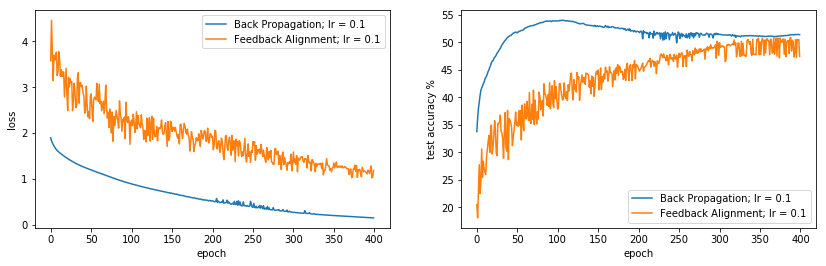

In [0]:
with open('BP_CFAR10_lr1.pickle', 'rb') as f:
    trainLoss_BP_CFAR10 = pickle.load(f)
    testAccuracy_BP_CFAR10 = pickle.load(f)

with open('FA_CFAR10_lr1.pickle', 'rb') as f:
    trainLoss_FA_CFAR10 = pickle.load(f)
    testAccuracy_FA_CFAR10 = pickle.load(f)

plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.plot(trainLoss_BP_CFAR10[:, 0], trainLoss_BP_CFAR10[:, 1], label = 'Back Propagation; lr = 0.1')
plt.plot(trainLoss_FA_CFAR10[:, 0], trainLoss_FA_CFAR10[:, 1], label = 'Feedback Alignment; lr = 0.1')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(testAccuracy_BP_CFAR10[:, 0], testAccuracy_BP_CFAR10[:, 1], label = 'Back Propagation; lr = 0.1')
plt.plot(testAccuracy_FA_CFAR10[:, 0], testAccuracy_FA_CFAR10[:, 1], label = 'Feedback Alignment; lr = 0.1')
plt.xlabel('epoch'); plt.ylabel('test accuracy %')
plt.legend()

**Discussion**

### Deep ANNs

#### Implementing feedback alignment on deeper network

Question: Does FA work in deep network? 

In [0]:
(X_train, Y_train), (X_test, Y_test) = preprocess('mnist')
net = FA_Network([784, 500, 500, 10], seed = 10) 
trainLoss, testAccuracy, deltaAngles = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.5, decay = 0.0, epochs = 400, batch_size = 128)

Epoch 0 cost: 43.77914270967238     test_accuracy: 9.819999999999995%     angle_between_deltas: [ 93.65822617 119.0456644 ]
Epoch 1 cost: 8.254403213992365     test_accuracy: 45.34%     angle_between_deltas: [ 89.00428076 116.79083255]
Epoch 2 cost: 2.481681559652696     test_accuracy: 68.07000000000001%     angle_between_deltas: [56.70356951 71.67009393]
Epoch 3 cost: 2.253065453872225     test_accuracy: 65.06%     angle_between_deltas: [47.91567254 63.62511026]
Epoch 4 cost: 1.9101892348730922     test_accuracy: 66.93%     angle_between_deltas: [57.63602166 73.56668692]
Epoch 5 cost: 1.2552940576837888     test_accuracy: 72.7%     angle_between_deltas: [55.07861112 72.01875956]
Epoch 6 cost: 0.9586146741281193     test_accuracy: 77.47%     angle_between_deltas: [52.66273655 70.83263542]
Epoch 7 cost: 0.8259210029123215     test_accuracy: 80.23%     angle_between_deltas: [51.18461618 70.00034654]
Epoch 8 cost: 0.7437395112910672     test_accuracy: 82.03%     angle_between_deltas: [50.

Epoch 72 cost: 0.2748703452395846     test_accuracy: 92.30000000000001%     angle_between_deltas: [47.55612537 62.00527384]
Epoch 73 cost: 0.2728802803510416     test_accuracy: 92.38%     angle_between_deltas: [47.54097429 61.97099958]
Epoch 74 cost: 0.2709671654667888     test_accuracy: 92.41%     angle_between_deltas: [47.52336523 61.9355257 ]
Epoch 75 cost: 0.2691316903515472     test_accuracy: 92.43%     angle_between_deltas: [47.50353657 61.89882757]
Epoch 76 cost: 0.2673741681839464     test_accuracy: 92.5%     angle_between_deltas: [47.48172788 61.86091341]
Epoch 77 cost: 0.2656943231316249     test_accuracy: 92.49000000000001%     angle_between_deltas: [47.45817487 61.82182172]
Epoch 78 cost: 0.26409129784770735     test_accuracy: 92.58999999999999%     angle_between_deltas: [47.43311124 61.7816136 ]
Epoch 79 cost: 0.2625637530629217     test_accuracy: 92.58999999999999%     angle_between_deltas: [47.40677161 61.74036407]
Epoch 80 cost: 0.26110995802041576     test_accuracy: 92

Epoch 144 cost: 0.2270013176289642     test_accuracy: 92.99%     angle_between_deltas: [45.33227814 58.08821217]
Epoch 145 cost: 0.22648568066672997     test_accuracy: 93.0%     angle_between_deltas: [45.28846567 58.03208454]
Epoch 146 cost: 0.22595499876887268     test_accuracy: 93.03%     angle_between_deltas: [45.24533678 57.97738631]
Epoch 147 cost: 0.22540917511010533     test_accuracy: 93.06%     angle_between_deltas: [45.20304952 57.92421423]
Epoch 148 cost: 0.2248481509303808     test_accuracy: 93.05%     angle_between_deltas: [45.16175803 57.87265442]
Epoch 149 cost: 0.22427190736594646     test_accuracy: 93.07%     angle_between_deltas: [45.12161001 57.82278132]
Epoch 150 cost: 0.2236804669518571     test_accuracy: 93.09%     angle_between_deltas: [45.08274447 57.77465693]
Epoch 151 cost: 0.22307389471665465     test_accuracy: 93.15%     angle_between_deltas: [45.04528966 57.7283304 ]
Epoch 152 cost: 0.22245229882438555     test_accuracy: 93.16%     angle_between_deltas: [45.

Epoch 215 cost: 0.17144775302954166     test_accuracy: 94.44%     angle_between_deltas: [45.41276702 57.18629974]
Epoch 216 cost: 0.17071064024064642     test_accuracy: 94.5%     angle_between_deltas: [45.4408672 57.1949671]
Epoch 217 cost: 0.1699794086330899     test_accuracy: 94.49%     angle_between_deltas: [45.46925559 57.20384842]
Epoch 218 cost: 0.16925406034092183     test_accuracy: 94.5%     angle_between_deltas: [45.49792338 57.21294055]
Epoch 219 cost: 0.1685345998857041     test_accuracy: 94.51%     angle_between_deltas: [45.52686193 57.22223982]
Epoch 220 cost: 0.16782103364791986     test_accuracy: 94.54%     angle_between_deltas: [45.55606269 57.23174189]
Epoch 221 cost: 0.16711336903451982     test_accuracy: 94.54%     angle_between_deltas: [45.58551703 57.24144159]
Epoch 222 cost: 0.1664116134509378     test_accuracy: 94.57%     angle_between_deltas: [45.61521618 57.25133275]
Epoch 223 cost: 0.16571577321128744     test_accuracy: 94.6%     angle_between_deltas: [45.6451

Epoch 287 cost: 0.1329510189012942     test_accuracy: 95.46%     angle_between_deltas: [47.72430477 57.88867361]
Epoch 288 cost: 0.1326011189594314     test_accuracy: 95.46%     angle_between_deltas: [47.75179843 57.892504  ]
Epoch 289 cost: 0.1322551464998077     test_accuracy: 95.47%     angle_between_deltas: [47.77887314 57.89595138]
Epoch 290 cost: 0.1319130457792448     test_accuracy: 95.47%     angle_between_deltas: [47.8055251  57.89901178]
Epoch 291 cost: 0.1315747606397482     test_accuracy: 95.47%     angle_between_deltas: [47.8317513  57.90168206]
Epoch 292 cost: 0.1312402345301534     test_accuracy: 95.47%     angle_between_deltas: [47.85754948 57.90395987]
Epoch 293 cost: 0.1309094105413389     test_accuracy: 95.47%     angle_between_deltas: [47.88291806 57.90584364]
Epoch 294 cost: 0.13058223145430994     test_accuracy: 95.47%     angle_between_deltas: [47.90785615 57.90733255]
Epoch 295 cost: 0.1302586398000891     test_accuracy: 95.48%     angle_between_deltas: [47.9323

Epoch 358 cost: 0.11498857183034814     test_accuracy: 95.8%     angle_between_deltas: [48.75250817 57.36338063]
Epoch 359 cost: 0.11480241572933464     test_accuracy: 95.8%     angle_between_deltas: [48.75671227 57.34802724]
Epoch 360 cost: 0.11461744201689979     test_accuracy: 95.8%     angle_between_deltas: [48.76071358 57.33253714]
Epoch 361 cost: 0.1144336301184203     test_accuracy: 95.8%     angle_between_deltas: [48.76451466 57.31691286]
Epoch 362 cost: 0.11425095972544867     test_accuracy: 95.78999999999999%     angle_between_deltas: [48.76811801 57.30115693]
Epoch 363 cost: 0.11406941079670653     test_accuracy: 95.8%     angle_between_deltas: [48.77152607 57.28527187]
Epoch 364 cost: 0.11388896355930177     test_accuracy: 95.8%     angle_between_deltas: [48.77474124 57.2692602 ]
Epoch 365 cost: 0.11370959851012832     test_accuracy: 95.81%     angle_between_deltas: [48.77776586 57.25312446]
Epoch 366 cost: 0.11353129641742984     test_accuracy: 95.81%     angle_between_del

In [0]:
with open('FA_MNIST_Deep.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)
    pickle.dump(deltaAngles, f)

In [0]:
with open('FA_MNIST_Deep.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)
    deltaAngles = pickle.load(f)


plt.figure(figsize = (21, 4))
plt.subplot(1,3,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1])
plt.xlabel('epoch'); plt.ylabel('loss')

plt.subplot(1,3,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1])
plt.xlabel('epoch'); plt.ylabel('test accuracy %')

deltaAngeles_1 = []
deltaAngeles_2 = []
for i in range(400):
    deltaAngeles_1.append(deltaAngles[i][1][0])
    deltaAngeles_2.append(deltaAngles[i][1][1])

plt.subplot(1,3,3)
plt.plot(deltaAngles[:,0], deltaAngeles_1)
plt.plot(deltaAngles[:,0], deltaAngeles_2)
plt.xlabel('epoch'); plt.ylabel('$\delta_{BP} \measuredangle \delta_{FA} $')

Text(0, 0.5, '$\\delta_{BP} \\measuredangle \\delta_{FA} $')

Answer: Yes!

#### Deep ANN with Backprop

Q: Can we improve CFAR10 accuracy by deeper ANN usingbackprop?

In [ ]:
(X_train, Y_train), (X_test, Y_test) = preprocess('cifar10')
net = Network([3072, 1000, 1000, 10]) 
trainLoss, testAccuracy = net.SGD(X_train, Y_train, X_test, Y_test, lrate = 0.1, decay = 0.0, epochs = 100, batch_size = 128)

In [ ]:
#saving the result of implementing of BP with lr = 0.1 
with open('BP_CFAR10_deep.pickle', 'wb') as f:
    pickle.dump(trainLoss, f)
    pickle.dump(testAccuracy, f)

Text(0, 0.5, 'test accuracy %')

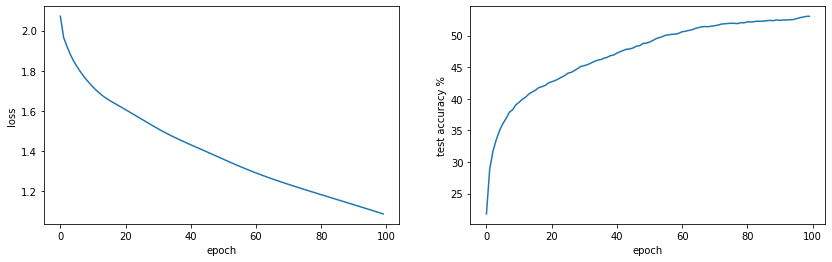

In [6]:
with open('BP_CFAR10_deep.pickle', 'rb') as f:
    trainLoss = pickle.load(f)
    testAccuracy = pickle.load(f)

plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.plot(trainLoss[:, 0], trainLoss[:, 1])
plt.xlabel('epoch'); plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(testAccuracy[:, 0], testAccuracy[:, 1])
plt.xlabel('epoch'); plt.ylabel('test accuracy %')

Answer: No!

### CNN architecture

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Data preprocessing
mean = np.mean(x_train, axis = (0, 1, 2, 3))
std = np.std(x_train, axis = (0, 1, 2, 3))
x_train = (x_train - mean) / (std + 1e-7)
x_test = (x_test - mean)/(std + 1e-7)

170500096/170498071 [==============================] - 4s 0us/step


**Observations**

Adding Bachnormalization improved the test accuracy by about 10% and hugely increased the speed of the optimization

Data pre-processing has reduced the fluctuation in test acuuracy vs. epoch plot. It has increased the speed of optimization quite a bit. 

Regularization/dropout is necessary to avoid overfitting. Otherwise, the train accuracy reaches 97% while the test accuracy gets stuck in 80%. 

Regularization/weight decay was not that much effective. It pushed the accuracy by ~1%. 


In [0]:
from keras import regularizers
decay = 1e-6

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', kernel_regularizer = regularizers.l2(decay), activation = 'relu', input_shape=(32, 32, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.3), 
    
  tf.keras.layers.Conv2D(192, (3, 3), padding = 'same', kernel_regularizer = regularizers.l2(decay), activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.4), 
    
  tf.keras.layers.Conv2D(384, (3, 3), padding = 'same', kernel_regularizer = regularizers.l2(decay), activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  
  tf.keras.layers.Conv2D(256, (3, 3), padding = 'same', kernel_regularizer = regularizers.l2(decay), activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  
  tf.keras.layers.Conv2D(256, (3, 3), padding = 'same', kernel_regularizer = regularizers.l2(decay), activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((3, 3), strides = 2),
  tf.keras.layers.Dropout(0.6), 
    
  tf.keras.layers.Flatten(),  
    
  tf.keras.layers.Dense(4096, activation = 'relu'),
  tf.keras.layers.Dropout(0.6),
    
  tf.keras.layers.Dense(2048, activation = 'relu'),
  tf.keras.layers.Dropout(0.6), 
    
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )
    
model.fit(x_train, y_train, batch_size = 128, epochs = 200, validation_data = (x_test, y_test));
    
accTrain = model.history.history['accuracy']
accTest = model.history.history['val_accuracy']

Epoch 1/200
391/391 [==============================] - 20s 52ms/step - loss: 2.3232 - accuracy: 0.2959 - val_loss: 2.6549 - val_accuracy: 0.1888
Epoch 2/200
391/391 [==============================] - 19s 50ms/step - loss: 1.4909 - accuracy: 0.4532 - val_loss: 1.4322 - val_accuracy: 0.4848
Epoch 3/200
391/391 [==============================] - 19s 50ms/step - loss: 1.2819 - accuracy: 0.5433 - val_loss: 1.0576 - val_accuracy: 0.6231
Epoch 4/200
391/391 [==============================] - 19s 49ms/step - loss: 1.1339 - accuracy: 0.6062 - val_loss: 0.9432 - val_accuracy: 0.6663
Epoch 5/200
391/391 [==============================] - 19s 49ms/step - loss: 1.0081 - accuracy: 0.6517 - val_loss: 0.9057 - val_accuracy: 0.6925
Epoch 6/200
391/391 [==============================] - 19s 49ms/step - loss: 0.9308 - accuracy: 0.6802 - val_loss: 0.8000 - val_accuracy: 0.7274
Epoch 7/200
391/391 [==============================] - 19s 50ms/step - loss: 0.8651 - accuracy: 0.7065 - val_loss: 0.8009 - val_ac

In [0]:
with open('CNN_CFAR10.pickle', 'wb') as f:
    pickle.dump(accTrain, f)
    pickle.dump(accTest, f)

Text(0, 0.5, 'testing accuracy')

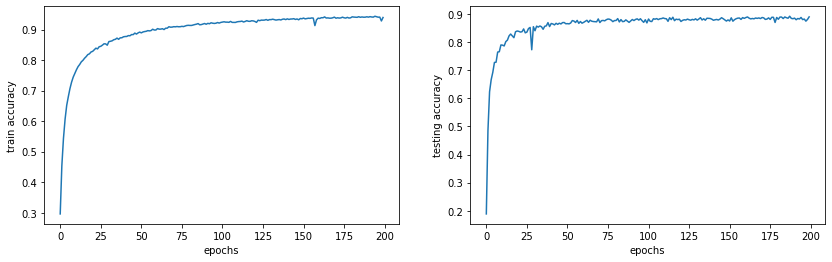

In [0]:
with open('CNN_CFAR10.pickle', 'rb') as f:
    accTrain = pickle.load(f)
    accTest = pickle.load(f)

plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.plot(accTrain)
plt.xlabel('epochs')
plt.ylabel('train accuracy')

plt.subplot(1,2,2)
plt.plot(accTest)
plt.xlabel('epochs')
plt.ylabel('testing accuracy')